# Goal framing theory v.1

## J.V.Douw 2009: Incentivising consumers in smart grids to shift their electricity use

Consumer behaviour with goal framing theory → Modelira se odločitve glede porabe električne energije. Hočejo ugotoviti, kaj bi prepričalo gospodinjstva, da varčujejo z električno energijo. V modelu so za varčevalni mehanizem izbrali premikanje porabniških akcij na bolj ugodne termine.

Za vodenje naravovarstvenih ciljev so pomembne tri vrste ciljev:

1. Hedonic
2. Gain
3. Normative

Iz zgornjih ciljev dobimo tri različne kategorije (Behavioural categories):

1. The price-conscious
2. The cleanliness-conscious
3. The convenience-oriented

Vsaka kategorija ima za različne cilje določene lastne uteži: 

| Arch Type (Kategorija)    | W-gain | W-convenience | W-cleanliness |
| ------------------------- | ------ | ------------- | ------------- |
| The price-conscious       | 1      | 0.5           | 0.5           |
| The cleanliness-conscious | 0.5    | 0.5           | 1             |
| The convenience-oriented  | 0.5    | 1             | 0.5           |

## Implementacija: Normalised Weights

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import itertools
import random
import copy
import pandas as pd
import networkx as nx

In [3]:
def createNetwork(totalAgents, connectionsPerAgent):
    # uporabi algoritem za generiranje omrežja
    network = nx.random_regular_graph(n = totalAgents, d = connectionsPerAgent) 
    # člene postavi na krožnico
    pos = nx.circular_layout(network) 
    # izriši graf
    plt.figure(figsize = (9, 6)) 
    nx.draw_networkx(network,pos)  
    
    return network

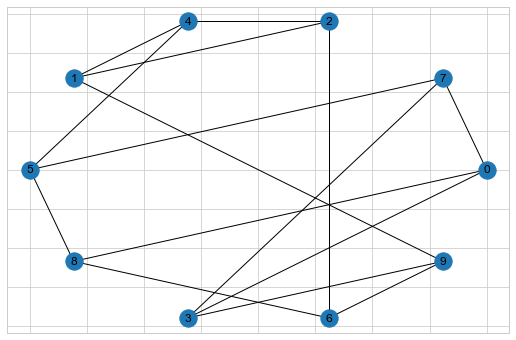

In [4]:
newNetwork = createNetwork(10, 3)

In [5]:
def addValuesToAgents(network):
    archType = ['Hedonic', 'Gain']
    
    for node in network.nodes:
        rand = random.randint(0,1)
        lifestyle = archType[rand]
        network.nodes[node]['lifestyle'] = lifestyle
        if lifestyle == 'Hedonic':
            network.nodes[node]['wGain'] = 0.5
            network.nodes[node]['wConvenience'] = 1.
        else:
            network.nodes[node]['wGain'] = 1.
            network.nodes[node]['wConvenience'] = 0.5
    return network


In [6]:
newNetwork = addValuesToAgents(newNetwork)
newNetwork.nodes.data()

NodeDataView({0: {'lifestyle': 'Hedonic', 'wGain': 0.5, 'wConvenience': 1.0}, 7: {'lifestyle': 'Gain', 'wGain': 1.0, 'wConvenience': 0.5}, 2: {'lifestyle': 'Hedonic', 'wGain': 0.5, 'wConvenience': 1.0}, 4: {'lifestyle': 'Hedonic', 'wGain': 0.5, 'wConvenience': 1.0}, 1: {'lifestyle': 'Hedonic', 'wGain': 0.5, 'wConvenience': 1.0}, 5: {'lifestyle': 'Gain', 'wGain': 1.0, 'wConvenience': 0.5}, 8: {'lifestyle': 'Gain', 'wGain': 1.0, 'wConvenience': 0.5}, 3: {'lifestyle': 'Hedonic', 'wGain': 0.5, 'wConvenience': 1.0}, 6: {'lifestyle': 'Gain', 'wGain': 1.0, 'wConvenience': 0.5}, 9: {'lifestyle': 'Gain', 'wGain': 1.0, 'wConvenience': 0.5}})

In [7]:
def normaliseWeight(agent,network):
    wNorm = 1 / (network.nodes[agent]['wGain']+network.nodes[agent]['wConvenience'])
    network.nodes[agent]['wNorm'] = wNorm

    return wNorm

In [8]:
test = normaliseWeight(1,newNetwork)
test

0.6666666666666666